**DSCI100 Project: Individual Planning Report** 
* Student Name: Zitong Zhao
* Student ID Number: 93003572

**(1) Data Description**

In [95]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

In [94]:
#check if library(tidyverse) loaded
tidyverse_conflicts()
tidyverse_packages()

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ scales::col_factor() masks readr::col_factor()
✖ scales::discard()    masks purrr::discard()
✖ dplyr::filter()      masks stats::filter()
✖ recipes::fixed()     masks stringr::fixed()
✖ dplyr::lag()         masks stats::lag()
✖ yardstick::spec()    masks readr::spec()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

[1] "broom"         "conflicted"    "cli"           "dbplyr"       
 [5] "dplyr"         "dtplyr"        "forcats"       "ggplot2"      
 [9] "googledrive"   "googlesheets4" "haven"         "hms"          
[13] "httr"          "jsonlite"      "lubridate"     "magrittr"     
[17] "modelr"        "pillar"        "purrr"         "ragg"         
[21] "readr"         "readxl"        "reprex"        "rlang"        
[25] "rstudioapi"    "rvest"         "stringr"       "tibble"       
[29] "tidyr"         "xml2"          "tidyverse"

In [91]:
#Loading the Dataset
url <- "https://raw.githubusercontent.com/Zitong06/data/refs/heads/main/players.csv"
players <- read_csv(url)
players
summary(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

**Data Overview：**
* **Number of Observations:** 196 rows
* **Number of Variables:** 7 columns 

**Variables Summary:**
* **experience(character)**: Categorical data representing player experience levels (Pro, Veteran, Regular, Amateur) lacks a standard scale and may need to be factorized.
* **subscribe(logic)**: Subscription status. No issues.
* **hashedEmail(character)**: Unrecognized email identifier. Not useful.
* **player_hours(double)**: The total number of hours the user plays. Skewed (0–223.1 hours).   
* **name(character)**: Player's name. Not useful.
* **gender(character)**: Player's gender. Not useful.
* **Age(double)**: Player's age. Skewed (8–50 years), 2 missing values.  

**Potential issues**
* **Sampling Bias**: Overrepresentation of younger players (e.g., 17-year-olds).  
* **Self-Reported Data**: Age and gender may be inaccurate, as respondents might provide incorrect information.
* **Measurement of played_hours**: Played_hours may capture idle time.  


**(2) Questions:**

* **Broad Question 2**: “We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.”
* **Specific Question**: Can age, subscription status, and prior experience predict the number of hours played?
* **Response Variable**: played_hours
* **Exploratory Variables**: experience, subscribe, gender, and Age.

**Data Wrangling Plan**:
* **Factorization of experience**: Convert experience and gender to factors.  
* **Missing Data Handling**: Remove 2 missing Age values.  
* **Standardization**: Ensure consistent formatting for categorical variables like gender.
* **Outlier Detection**: Identify potential outliers in played_hours and Age.
* **Feature Engineering**: Create interaction terms if necessary to capture complex relationships

**(3) Exploratory Data Analysis and Visualization**

In [79]:
#Factorize experience and gender
players <- players |>
  mutate(experience = factor(experience),
        gender = factor(gender))
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


**Mean Values for Quantitative Variables**

In [80]:
# Calculate means
mean_age <- mean(players$Age, na.rm = TRUE)
mean_played_hours <- mean(players$played_hours, na.rm = TRUE)

# Create a table of means
means_table <- data.frame(Variable = c("Age", "Played Hours"),
                          Mean = c(mean_age, mean_played_hours))

knitr::kable(means_table, caption = "Mean Values for Quantitative Variables")



Table: Mean Values for Quantitative Variables

|Variable     |      Mean|
|:------------|---------:|
|Age          | 20.520619|
|Played Hours |  5.845918|

**Exploratory Visualizations**

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


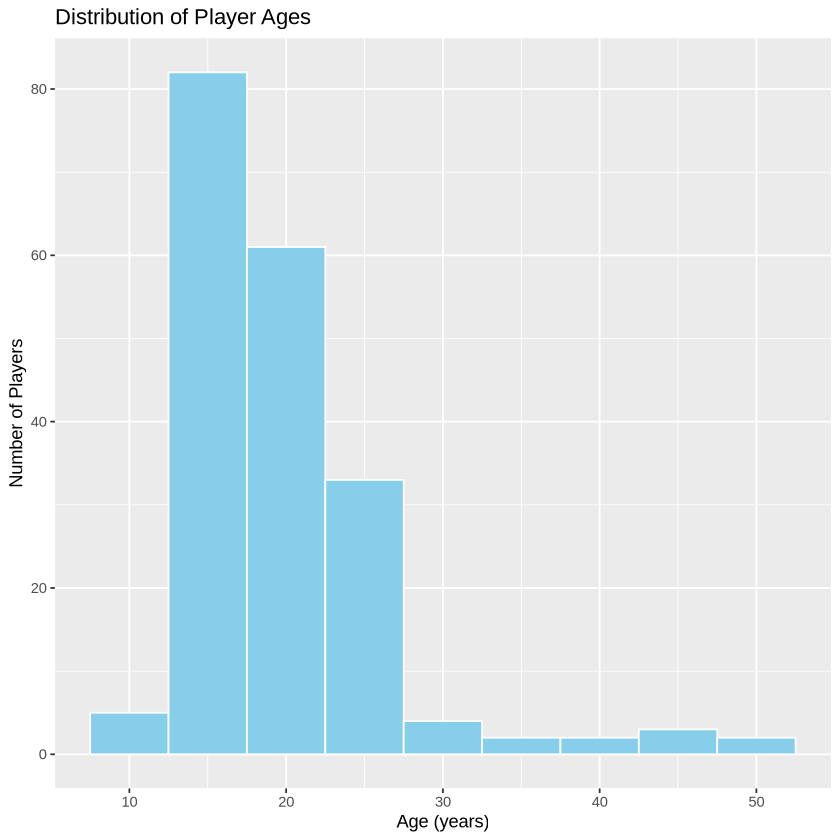

In [81]:
age_players <- ggplot(players, aes(x = Age)) +
      geom_histogram(binwidth = 5, fill = "skyblue", color = "white") +
      labs(title = "Distribution of Player Ages",x = "Age (years)",y = "Number of Players") 
age_players

**Age Distribution Table**: Most players are between 10-30 years old, peaking in the 15-20 range, indicating a younger player base.

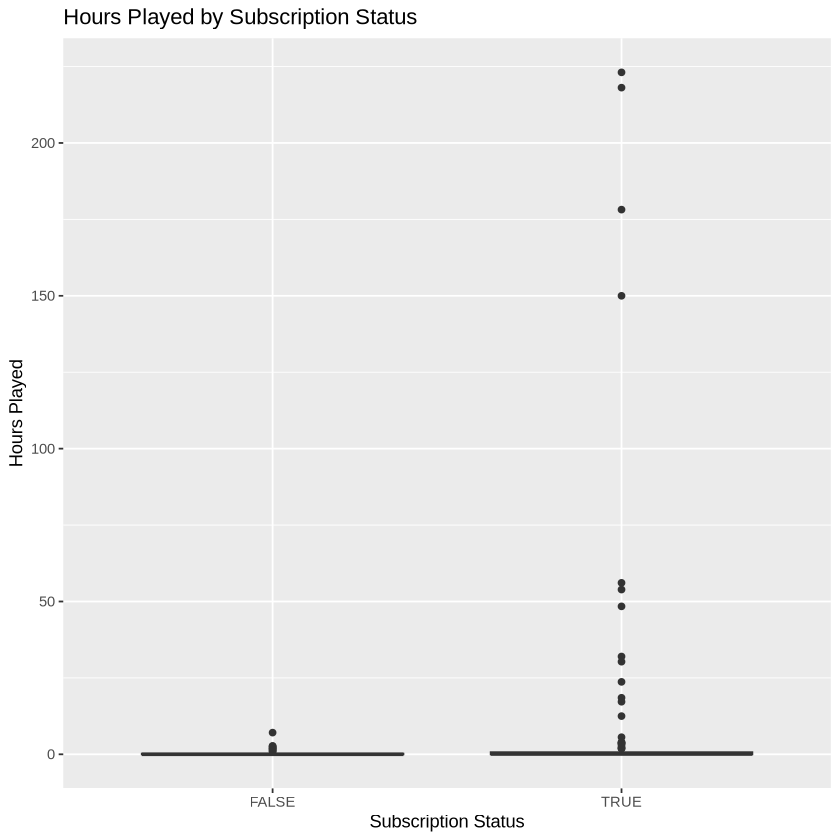

In [82]:
sub_status <- ggplot(players, aes(x = subscribe, y = played_hours)) +
      geom_boxplot(fill = "lightgrey") +
      labs(title = "Hours Played by Subscription Status",x = "Subscription Status",y = "Hours Played")
sub_status

**Subscription Impact Boxplot**: Subscribed players have higher median playtime, suggesting subscription status may predict data contribution.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


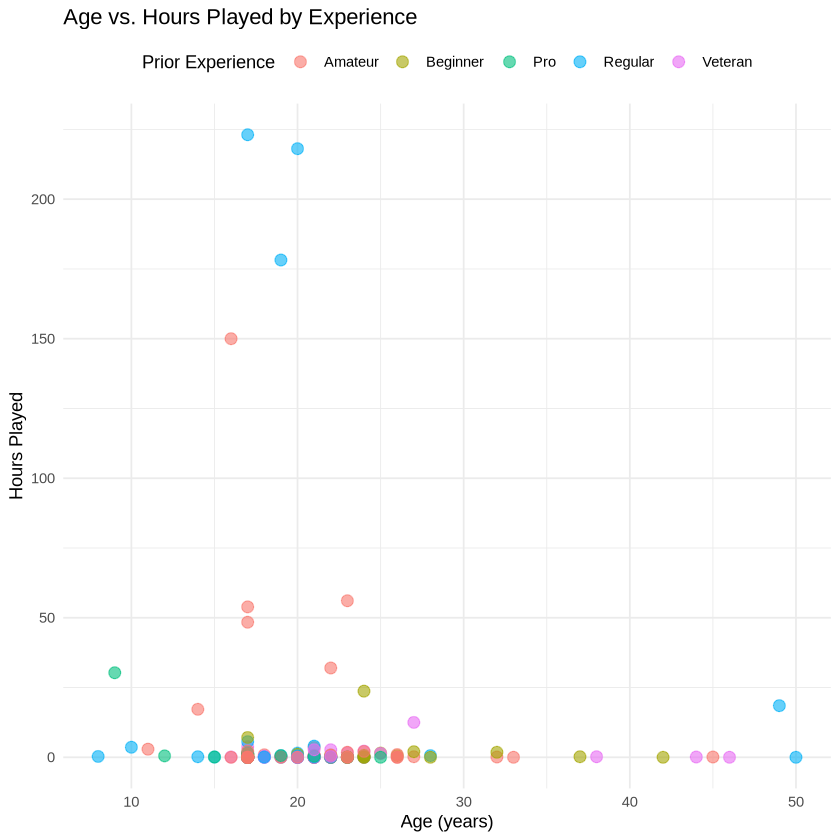

In [83]:
experience_players <- ggplot(players, aes(x = Age, y = played_hours, color = experience)) +
      geom_point(alpha = 0.6, size = 3) +
      labs(title = "Age vs. Hours Played by Experience",x = "Age (years)",y = "Hours Played",color = "Prior Experience")+
      theme_minimal()+
      theme(legend.position = "top")
experience_players

**Age vs. Playtime Scatterplot**: Experienced players tend to have higher playtimes, suggesting targeting this group could maximize data collection.

**(4)Methods and Plan**

**Method Selection**
* Use multiple linear regression to model played_hours vs. Age, subscribe, experience.  

**Reasons**
* Predicts continuous outcome, handles multiple predictors, and assesses independent contributions.  

**Required Assumptions**
* **Linearity:** The relationship between predictors and the outcome is linear.
* **Independence:** Observations are independent.
* **Homoscedasticity:** The variance of residuals is constant across all levels of predictors.
* **Normality:** Residuals are approximately normally distributed.
* **No multicollinearity:** Predictors are not highly correlated with each other.

**Potential Limitations**
* It assumes linear relationships, potentially missing complex patterns.
* Multiple linear regression is sensitive to outliers and requires a sufficient sample size for the number of predictors.
* It cannot establish causality, only associations.
* The method assumes normal residuals and homoscedasticity and may perform poorly if violated.

* **Model Comparison and Selection**
* **R-squared:** To assess the proportion of variance the model explains.
* **Adjusted R-squared:** To account for model complexity and prevent overfitting.
* **RMSE:** The square root of MSE and interpretable independent variables, making it more intuitive for practical interpretation.

**Data Processing Approach**
* **Data Splitting:** 70% training, 30% testing.  
* **Missing Data:** Remove missing Age values.  
* **Variable Transformation:** Factorize experience and standardize Age if needed.  
* **Validation:** There will be a 5-fold cross-validation for model stability and generalizability, balancing analysis with dataset size and structure.